# **Consensus atlas of ATAC regions (hg38)** 

In [2]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import os

# pip install gprofiler
from gprofiler import gprofiler

# **ATAC regulatory regions from human brain primary samples**

In [3]:
pwd

'/home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/1.GRN'

In [4]:
!mkdir /home/jovyan/jm_jlab/data_indNeuro/consensus_atlas_ATACregions_hg38/

In [5]:
folder = "/home/jovyan/jm_jlab/data_indNeuro/consensus_atlas_ATACregions_hg38/"

In [6]:
cd $folder

/home/jovyan/jm_jlab/data_indNeuro/consensus_atlas_ATACregions_hg38


### **Trevino all (hg38)**

In [7]:
# From GitHub: https://github.com/GreenleafLab/brainchromatin/blob/main/links.txt

#Multiome:
!wget https://atrev.s3.amazonaws.com/brainchromatin/multiome_atac_consensus_peaks.txt.gz -O tr21multiome.txt.gz

#single ATAC-seq
!wget https://atrev.s3.amazonaws.com/brainchromatin/atac_consensus_peaks.bed.gz -O tr21atac.bed.gz

--2023-01-20 10:16:07--  https://atrev.s3.amazonaws.com/brainchromatin/multiome_atac_consensus_peaks.txt.gz
Resolving atrev.s3.amazonaws.com (atrev.s3.amazonaws.com)... 52.217.142.65, 52.217.199.25, 52.217.234.65, ...
Connecting to atrev.s3.amazonaws.com (atrev.s3.amazonaws.com)|52.217.142.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18315449 (17M) [application/octet-stream]
Saving to: ‘tr21multiome.txt.gz’

tr21multiome.txt.gz 100%[===================>]  17.47M  3.40MB/s    in 13s     

2023-01-20 10:16:20 (1.39 MB/s) - ‘tr21multiome.txt.gz’ saved [18315449/18315449]

--2023-01-20 10:16:21--  https://atrev.s3.amazonaws.com/brainchromatin/atac_consensus_peaks.bed.gz
Resolving atrev.s3.amazonaws.com (atrev.s3.amazonaws.com)... 54.231.171.57, 54.231.225.73, 52.216.168.235, ...
Connecting to atrev.s3.amazonaws.com (atrev.s3.amazonaws.com)|54.231.171.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5289232 (5.0M) [application/octe

**Markenscoff-Papadimitriou et al (hg38)**

In [8]:
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149268/suppl/GSE149268%5Fannotation%2Docr%2Dhg38%2Ebed%2Egz -O mk20ocr.txt.gz

--2023-01-20 10:16:24--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE149nnn/GSE149268/suppl/GSE149268%5Fannotation%2Docr%2Dhg38%2Ebed%2Egz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 165.112.9.230, 2607:f220:41e:250::12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862987 (843K) [application/x-gzip]
Saving to: ‘mk20ocr.txt.gz’

mk20ocr.txt.gz      100%[===================>] 842.76K   622KB/s    in 1.4s    

2023-01-20 10:16:27 (622 KB/s) - ‘mk20ocr.txt.gz’ saved [862987/862987]



**de la Torre-Ubieta et. al (hg19)**

In [9]:
!wget https://www.cell.com/cms/10.1016/j.cell.2017.12.014/attachment/ec8faf3a-8470-4855-886d-cfb014c48573/mmc1.xlsx -O dT.xlsx

--2023-01-20 10:16:28--  https://www.cell.com/cms/10.1016/j.cell.2017.12.014/attachment/ec8faf3a-8470-4855-886d-cfb014c48573/mmc1.xlsx
Resolving www.cell.com (www.cell.com)... 104.18.123.114, 104.18.124.114
Connecting to www.cell.com (www.cell.com)|104.18.123.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9764146 (9.3M) [application/octet-stream]
Saving to: ‘dT.xlsx’

dT.xlsx             100%[===================>]   9.31M  10.5MB/s    in 0.9s    

2023-01-20 10:16:30 (10.5 MB/s) - ‘dT.xlsx’ saved [9764146/9764146]



**Processing**

In [10]:
ls

dT.xlsx  mk20ocr.txt.gz  tr21atac.bed.gz  tr21multiome.txt.gz


In [11]:
mk20 = pd.read_csv("mk20ocr.txt.gz", sep='\t', header=None, compression="gzip")
mk20[3] = "mk20_"+mk20.index.astype(str)
mk20 = mk20[~mk20[0].isin(['chr7_KI270803v1_alt', 'chr8_KI270821v1_alt', 'chr15_KI270850v1_alt', 'chr22_KI270879v1_alt'])]

In [13]:
#print(mk20.head())
print("Number of peaks: %d" %len(mk20))

Number of peaks: 103804


In [14]:
# Downloading hg38 chromosome sizes as required for flankBed
!wget https://hgdownload.cse.ucsc.edu/goldenpath/hg38/bigZips/hg38.chrom.sizes

--2023-01-20 10:18:33--  https://hgdownload.cse.ucsc.edu/goldenpath/hg38/bigZips/hg38.chrom.sizes
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11672 (11K)
Saving to: ‘hg38.chrom.sizes’

hg38.chrom.sizes    100%[===================>]  11.40K  --.-KB/s    in 0s      

2023-01-20 10:18:35 (92.5 MB/s) - ‘hg38.chrom.sizes’ saved [11672/11672]



**Function for plotting peak count per chromosome and lineplot for chromosome size**

In [16]:
def peak_count_plot(dataframe):
    df_plot = dataframe.iloc[:,0].value_counts().rename_axis('chromosomes').reset_index(name='counts')
    df_plot['counts'] = np.log(df_plot['counts'])

    chrsizes = pd.read_csv("/home/jovyan/jm_jlab/data_indNeuro/consensus_atlas_ATACregions_hg38/hg38.chrom.sizes", header=None, sep='\t')

    chrsizes.rename(columns={0:"chromosomes", 1:"size"}, inplace=True)

    df_plot = df_plot.merge(chrsizes, how = 'inner', on = ['chromosomes'])
    df_plot['size'] = np.log(df_plot['size'])

    df_plot['chromosomes'] = df_plot['chromosomes'].str.replace(r'chr', '')
    df_plot.sort_values(by=['chromosomes'], inplace=True)
    print(df_plot.head())
    print(len(df_plot.head()))

    chr_list = dataframe.iloc[:,0].value_counts().rename_axis('chromosomes').reset_index(name='counts')['chromosomes'].unique()   
    
    if len(chr_list) < 22:
        raise "Function was expecting at least 22 chromosomes"
    if 'chrX' and 'chrY' in chr_list:
        p1 = sns.barplot(data=df_plot, x="chromosomes", y="size", order=np.arange(1,23).astype(str).tolist()+['X','Y'])
        p1.set_xticklabels(p1.get_xticklabels(), rotation=90)
    if ('chrX' in chr_list) and ('chrY' not in chr_list):
        p1 = sns.barplot(data=df_plot, x="chromosomes", y="size", order=np.arange(1,23).astype(str).tolist()+['X'])
        p1.set_xticklabels(p1.get_xticklabels(), rotation=90)
    if ('chrY' in chr_list) and ('chrX' not in chr_list):
        p1 = sns.barplot(data=df_plot, x="chromosomes", y="size", order=np.arange(1,23).astype(str).tolist()+['Y'])
        p1.set_xticklabels(p1.get_xticklabels(), rotation=90)
    if ('chrY' not in chr_list) and ('chrX' not in chr_list):
        p1 = sns.barplot(data=df_plot, x="chromosomes", y="size", order=np.arange(1,23).astype(str).tolist())
        p1.set_xticklabels(p1.get_xticklabels(), rotation=90)
        
    # get the xtick locations
    xticks = p1.get_xticks()

    # plot the line to the xtick locs (or df.index)
    p2 = sns.lineplot(data=df_plot, x=xticks, y='counts', marker='o', ax=p1)

    p1.set(ylabel='log peak count (bar) or log chr size (line)', xlabel='chromosome')
    plt.show()
      

   chromosomes    counts       size
1            1  9.052048  19.332788
9           10  8.538367  18.711837
8           11  8.564077  18.721427
10          12  8.473659  18.707928
12          13  8.227643  18.554900
5


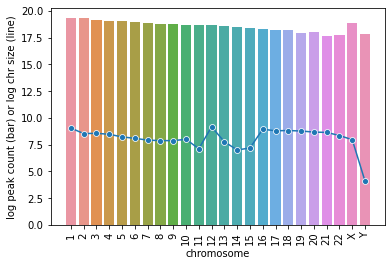

In [17]:
peak_count_plot(mk20)

In [18]:
tr21singl = pd.read_csv("tr21atac.bed.gz", sep='\t', header=None, compression='gzip')
tr21singl = tr21singl.iloc[:,0:3]
tr21singl[3] = "tr21singleome_"+tr21singl.index.astype(str)
tr21mult = pd.read_csv("tr21multiome.txt.gz", sep='\t', compression='gzip')
tr21mult = tr21mult.iloc[:,0:3]
tr21mult['start'] = tr21mult['start']-1 #Must be 0-based
tr21mult[3] = "tr21multiome_"+tr21mult.index.astype(str)

In [19]:
#print(tr21singl.head())
print("Number of peaks Trevino singleome: %d" %len(tr21singl))
print("")

#print(tr21mult.head())
print("Number of peaks Trevino multiome: %d" %len(tr21mult))

Number of peaks Trevino singleome: 657930

Number of peaks Trevino multiome: 467315


   chromosomes     counts       size
1            1  10.964138  19.332788
9           10  10.421924  18.711837
7           11  10.443280  18.721427
10          12  10.387456  18.707928
14          13   9.958686  18.554900
5


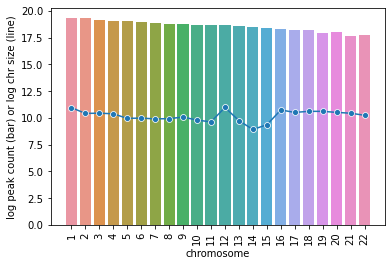

In [20]:
peak_count_plot(tr21singl)

   chromosomes     counts       size
0            1  10.630674  19.332788
9           10  10.065946  18.711837
6           11  10.130822  18.721427
10          12  10.024288  18.707928
16          13   9.553292  18.554900
5


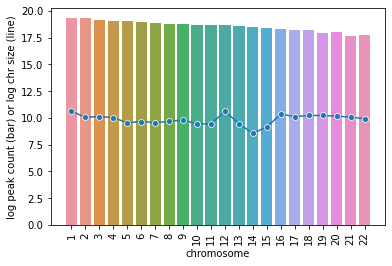

In [21]:
peak_count_plot(tr21mult)

In [23]:
ls

dT.xlsx  hg38.chrom.sizes  mk20ocr.txt.gz  tr21atac.bed.gz  tr21multiome.txt.gz


In [24]:
dT_hg19 = pd.read_excel("./dT.xlsx") #pip install openpyxl
print(dT_hg19.head(2))

  Chr  peakstart  peakend   baseMean  log2FoldChange     lfcSE      stat  \
0   1      10063    10571  10.714139        0.609023  0.252019  2.416574   
1   1     713768   714577  68.479998        0.048751  0.119628  0.407526   

     pvalue      padj  GCcontent                      ENSGIDatTSS HGNCatTSS  \
0  0.015667  0.027984   0.550098                  ENSG00000223972   DDX11L1   
1  0.683622  0.744199   0.649383  ENSG00000228327;ENSG00000237491         ;   

                         biotypeatTSS  
0  transcribed_unprocessed_pseudogene  
1                     lincRNA;lincRNA  


/opt/conda/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [25]:
dT_hg19 = dT_hg19.iloc[:,0:3]
dT_hg19['Chr'] = 'chr'+dT_hg19['Chr'].astype(str)
print(dT_hg19.head(2))
dT_hg19['peak_name'] = "dT18_"+dT_hg19.index.astype(str)
print("Number of peaks %d" %len(dT_hg19))

    Chr  peakstart  peakend
0  chr1      10063    10571
1  chr1     713768   714577
Number of peaks 62005


   chromosomes    counts       size
1            1  8.555067  19.332788
10          10  7.953670  18.711837
8           11  8.087333  18.721427
9           12  8.047829  18.707928
12          13  7.742836  18.554900
5


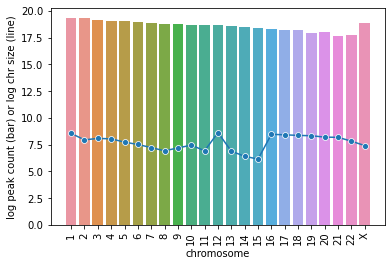

In [26]:
peak_count_plot(dT_hg19) #chromosome size corresponds to hg38 though, just in case to spot weird things

**Saving bed files**

In [27]:
tr21singl.to_csv("./trS.bed", sep='\t', header=None, index=False)
tr21mult.to_csv("./trM.bed", sep='\t', header=None, index=False)
mk20.to_csv("./mk20.bed", sep='\t', header=None, index=False)
dT_hg19.to_csv("./dT18_hg19.bed", sep='\t', header=None, index=False)

In [28]:
for item in ['tr21multiome.txt.gz', 'tr21atac.bed.gz', 'mk20ocr.txt.gz', 'dT.xlsx']:
    os.remove(item)

In [29]:
ls

dT18_hg19.bed  hg38.chrom.sizes  mk20.bed  trM.bed  trS.bed


In [30]:
!bedtools sort -i trS.bed > trS_sorted.bed

In [31]:
!bedtools sort -i trM.bed > trM_sorted.bed

In [32]:
!bedtools sort -i mk20.bed > mk_sorted.bed

In [33]:
!bedtools sort -i dT18_hg19.bed > dT18_hg19_sorted.bed

In [34]:
for item in ['dT18_hg19.bed',  'mk20.bed',  'trM.bed',  'trS.bed']:
    os.remove(item)

In [35]:
!cat trS_sorted.bed | wc -l
!cat trM_sorted.bed | wc -l
!cat mk_sorted.bed | wc -l
!cat dT18_hg19_sorted.bed | wc -l

657930
467315
103804
62005


**de la Torre-Ubieta hg19 to hg38**

In [36]:
!wget https://hgdownload.cse.ucsc.edu/goldenpath/hg19/liftOver/hg19ToHg38.over.chain.gz

--2023-01-20 10:22:50--  https://hgdownload.cse.ucsc.edu/goldenpath/hg19/liftOver/hg19ToHg38.over.chain.gz
Resolving hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu (hgdownload.cse.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227698 (222K) [application/x-gzip]
Saving to: ‘hg19ToHg38.over.chain.gz’

hg19ToHg38.over.cha 100%[===================>] 222.36K   343KB/s    in 0.6s    

2023-01-20 10:22:51 (343 KB/s) - ‘hg19ToHg38.over.chain.gz’ saved [227698/227698]



In [37]:
!rm dT18_unlifted.bed # wc -l: 48
!rm dT18_hg19_sorted.bed

In [38]:
ls

dT18_hg38_sorted.bed      hg38.chrom.sizes  trM_sorted.bed
hg19ToHg38.over.chain.gz  mk_sorted.bed     trS_sorted.bed


In [40]:
!intersectBed -wo -filenames -f 0.5 -a trS_sorted.bed -b trM_sorted.bed mk_sorted.bed dT18_hg38_sorted.bed | uniq | head -n 2 

chr1	10027	10528	tr21singleome_0	dT18_hg38_sorted.bed	chr1	10063	10571	dT18_0	465
chr1	180646	181147	tr21singleome_1	trM_sorted.bed	chr1	180450	180951	tr21multiome_0	305
uniq: write error: Broken pipe


In [41]:
# -wa to show original entries; in this case, Trevino singleome
!intersectBed -wa -f 0.5 -a trS_sorted.bed -b trM_sorted.bed mk_sorted.bed dT18_hg38_sorted.bed | uniq | head -n 2

chr1	10027	10528	tr21singleome_0
chr1	180646	181147	tr21singleome_1
uniq: write error: Broken pipe


In [42]:
# Saving (hg38). Trevino singleome ATAC contains the higher number of peaks.
# These were required to overlap at least 50% with either:
# 1) Trevino multiome
# 2) Markenscoff-Papadimitriou ATAC
# 3) de la Torre-Ubieta
!intersectBed -wa -f 0.5 -a trS_sorted.bed -b trM_sorted.bed mk_sorted.bed dT18_hg38_sorted.bed | uniq > trS_intersected_consensus.bed

**concat X, Y chr signals**

In [43]:
!grep 'chrY\|chrX' mk_sorted.bed > mk_XY.bed
!grep 'chrX' dT18_hg38_sorted.bed > dT18_X.bed

In [44]:
!cat mk_XY.bed dT18_X.bed > XY_all.bed
!bedtools sort -i XY_all.bed > XY_all_sorted.bed
!cat trS_intersected_consensus.bed XY_all_sorted.bed > consensus_signals.bed

In [45]:
!cat consensus_signals.bed | head -n 10

chr1	10027	10528	tr21singleome_0
chr1	180646	181147	tr21singleome_1
chr1	181233	181734	tr21singleome_2
chr1	191217	191718	tr21singleome_3
chr1	633776	634277	tr21singleome_8
chr1	778421	778922	tr21singleome_9
chr1	778935	779436	tr21singleome_10
chr1	826614	827115	tr21singleome_14
chr1	827252	827753	tr21singleome_15
chr1	858586	859087	tr21singleome_20
cat: write error: Broken pipe


In [46]:
!cat consensus_signals.bed | uniq | wc -l

392961


In [47]:
!rm *_sorted.bed

!rm dT18_X.bed mk_XY.bed trS_intersected_consensus.bed XY_all.bed

In [48]:
ls

consensus_signals.bed  hg19ToHg38.over.chain.gz  hg38.chrom.sizes


In [49]:
#plotting consensus peaks

plot1 = pd.read_csv("/home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/consensus_signals.bed", sep='\t', header=None)

   chromosomes     counts       size
1            1  10.440332  19.332788
9           10   9.879912  18.711837
7           11   9.935955  18.721427
10          12   9.847076  18.707928
15          13   9.403684  18.554900
5


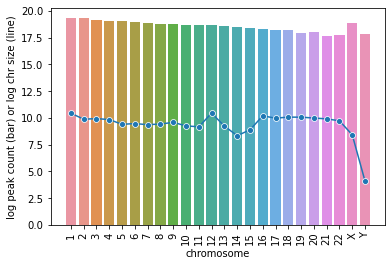

In [50]:
peak_count_plot(plot1)

**consensus_signals.bed to GREAT web server to build base GRN**

In [54]:
!mkdir ./GREAT_results

Using GREAT default options (version 4.0.4)
    
    Species Assembly: Human: GRCh38 (UCSC hg38, Dec. 2013)
    Test regions: consensus_signals.bed
    Background regions: Whole genome
    Settings:
         Basal plus extension
             Proximal: 5 kb upstream, 1 kb downstream, plus Distal: 1000 up to kb
         Included curated regulatory domains 

Files saved as:
    Genomic region -> gene association table --> consensus_peaks_hg38_GREAT.txt
    Gene-genomic region --> consensus_peaks_hg38_GREATallgenes.txt

#### **Regulatory region coordinates from human brain primary samples**

#### *Intersecting with Homo species-specific changes*

**(1) Replicated signals that contain Homo sapiens-derived changes**

In [51]:
pwd

'/home/jovyan/jm_jlab/data_indNeuro/consensus_atlas_ATACregions_hg38'

In [91]:
# From Kulhwilm and Boeckx (2019)
## Na_arcHFcoords_hg38.bed
## Na_high_freq_hg38.bed

!intersectBed -a /home/jovyan/jm_jlab/martinboeckx_to_hg38/Na_high_freq_hg38.bed -b consensus_signals.bed -wo -f 1 | uniq | wc -l

11705


In [93]:
!intersectBed -a /home/jovyan/jm_jlab/martinboeckx_to_hg38/Na_high_freq_hg38.bed -b consensus_signals.bed -wo -f 1 > consensus_signals_w_homosapiensSNV.bed

In [98]:
!cat ./consensus_signals_w_homosapiensSNV.bed | head -n 2 # For enrichment too

chr1	99677045	99677046	rs12063715	chr1	99676864	99677365	tr21singleome_27954	1
chr1	99677091	99677092	rs76085216	chr1	99676864	99677365	tr21singleome_27954	1
cat: write error: Broken pipe


In [99]:
ls

consensus_signals.bed                   hg19ToHg38.over.chain.gz
consensus_signals_w_homosapiensSNV.bed  hg38.chrom.sizes


**(2) Extending to 3k bp around variants**

In [102]:
# consensus_signals_w_homosapiensSNV.bed
# (i) awk: Selecting first four columns (chr, start, end, rsID) and write tmp file as tab-delimited
# (ii) Extending 3000bp around using flankBed (it requires chromosomes' size info)
## If there are two SNPs close enough, the resulting island will be higher than 3000bp

!cat consensus_signals_w_homosapiensSNV.bed | uniq | awk 'BEGIN {OFS="\t"}; { print $1, $2, $3, $4 }' > tmp_consensus_signals_w_homosapiensSNV.bed
!flankBed -i tmp_consensus_signals_w_homosapiensSNV.bed -g hg38.chrom.sizes -b 1500 > tmp2_consensus_signals_w_homosapiensSNV.bed

!rm tmp_consensus_signals_w_homosapiensSNV.bed

!sortBed -i tmp2_consensus_signals_w_homosapiensSNV.bed > tmp2_consensus_signals_w_homosapiensSNV_sorted.bed

!mergeBed -i tmp2_consensus_signals_w_homosapiensSNV_sorted.bed -d 1 > extended_consensus_w_homosapiensSNV_sorted.bed

## Calculate length each interval:
## !mergeBed -i tmp2_consensus_signals_w_homosapiensSNV_sorted.bed -d 1 | awk '{print($3-$2)}' | head

!rm tmp2_consensus_signals_w_homosapiensSNV.bed tmp2_consensus_signals_w_homosapiensSNV_sorted.bed

In [104]:
!cat extended_consensus_w_homosapiensSNV_sorted.bed | head -n 2

chr1	1134796	1137797
chr1	1596260	1599261
cat: write error: Broken pipe


In [105]:
!cat extended_consensus_w_homosapiensSNV_sorted.bed | wc -l

8976


**(3) Excluding windows that contained Neanderthal/Denisovan variants: Homo sapiens-specific islands**

In [107]:
# islands with Homo sapiens-derived variants
!intersectBed -wo -v -a extended_consensus_w_homosapiensSNV_sorted.bed -b /home/jovyan/jm_jlab/martinboeckx_to_hg38/Na_arcHFcoords_hg38.bed | wc -l

4836


In [109]:
!intersectBed -wo -v -a extended_consensus_w_homosapiensSNV_sorted.bed -b /home/jovyan/jm_jlab/martinboeckx_to_hg38/Na_arcHFcoords_hg38.bed | head -n 2

chr1	1596260	1599261
chr1	2267948	2270949


In [112]:
!intersectBed -wo -v -a extended_consensus_w_homosapiensSNV_sorted.bed -b /home/jovyan/jm_jlab/martinboeckx_to_hg38/Na_arcHFcoords_hg38.bed > islands_HomoSapiens.bed

In [113]:
!cat islands_HomoSapiens.bed | head

chr1	1596260	1599261
chr1	2267948	2270949
chr1	2310792	2313793
chr1	2436081	2439082
chr1	2910457	2913458
chr1	2927293	2930429
chr1	3118332	3121333
chr1	3196887	3199888
chr1	3214914	3217915
chr1	3257573	3260574
cat: write error: Broken pipe


In [114]:
!cat islands_HomoSapiens.bed | wc -l

4836


In [116]:
ls

consensus_signals.bed                           hg19ToHg38.over.chain.gz
consensus_signals_w_homosapiensSNV.bed          hg38.chrom.sizes
extended_consensus_w_homosapiensSNV_sorted.bed  islands_HomoSapiens.bed


In [117]:
# Add SNV position to the islands
!intersectBed -wo -a /home/jovyan/jm_jlab/martinboeckx_to_hg38/Na_high_freq_hg38.bed -b islands_HomoSapiens.bed | uniq > islands_HomoSapiens_SNVpos.bed

In [119]:
# Add SNV position to the islands
!intersectBed -wo -v -b /home/jovyan/jm_jlab/martinboeckx_to_hg38/Na_high_freq_hg38.bed -a islands_HomoSapiens.bed | wc -l #as expected

0


In [122]:
# extended regions that *do* contain Neanderthal/Denisovan variants
!cat islands_HomoSapiens.bed | uniq | wc -l

4836


In [125]:
# extended regions that *do* contain Neanderthal/Denisovan variants
!cat islands_HomoSapiens.bed | uniq | head -n 2

chr1	1596260	1599261
chr1	2267948	2270949
uniq: write error: Broken pipe


In [127]:
!awk '{print  $0 "\t region_" NR }' islands_HomoSapiens.bed > uniqID_islands_HomoSapiens.bed

In [128]:
!cat uniqID_islands_HomoSapiens.bed | head -n 2

chr1	1596260	1599261	 region_1
chr1	2267948	2270949	 region_2
cat: write error: Broken pipe


In [129]:
!cat uniqID_islands_HomoSapiens.bed | wc -l 

4836


# **Regulatory region-gene association via Genomic Regions Enrichment of Annotations Tool (GREAT)**

In [130]:
!gzip /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/20221104-public-4.0.4-Qvpddd-hg38-all-region.txt

In [176]:
!mkdir enrichment_results

In [132]:
#Output from GREAT (hg38): 20221029-public-4.0.4-lQ7Q3G-hg38-all-region

great_output  = pd.read_csv("./20221104-public-4.0.4-Qvpddd-hg38-all-region.txt.gz", sep='\t', compression='gzip')

In [133]:
great_output.head()

,# GREAT version 4.0.4,Species assembly: hg38,"Association rule: Basal+extension: 5000 bp upstream, 1000 bp downstream, 1000000 bp max extension, curated regulatory domains included"
0,region_1,"SSU72 (-22892), FNDC10 (+2335)",NaN
1,region_2,"RER1 (-122384), SKI (+40754)",NaN
2,region_3,"RER1 (-79540), SKI (+83598)",NaN
3,region_4,"PLCH2 (-38733), PEX10 (-25052)",NaN
4,region_5,"MMEL1 (-278968), ACTRT2 (-109525)",NaN


In [134]:
great_output = great_output.iloc[:,0:2]
great_output.rename(columns={'# GREAT version 4.0.4':"peak_name", 'Species assembly: hg38':'gene_name'}, inplace=True)

In [135]:
len(great_output)

4836

In [136]:
great_output['gene_name'] = great_output['gene_name'].str.replace(r"\(.*?\)", "", regex=True).str.strip().str.split(" , ")

great_output = great_output.explode('gene_name')

great_output = great_output[great_output["gene_name"].str.contains("NONE")==False]

In [137]:
great_output.head(2)

,peak_name,gene_name
0,region_1,SSU72
0,region_1,FNDC10


In [138]:
print("Number of genes associated to Homo sapiens regulatory islands: %d" %len(great_output['gene_name'].unique()))

Number of genes associated to Homo sapiens regulatory islands: 4797


In [177]:
pd.DataFrame(great_output['gene_name'].unique(), columns=["gene_names"]).to_csv("./enrichment_results/uniqID_islands_HomoSapiens_genenames.tsv", sep='\t', index=False)

In [141]:
pd.DataFrame(great_output['gene_name'].unique(), 
             columns=["gene_names"]).to_csv("/home/jovyan/jm_jlab/CBL_data/indirectNeurogenesis/regulatory_islands/uniqID_islands_HomoSapiens_genenames.tsv", sep='\t', index=False)

In [144]:
enrichment = gprofiler(great_output['gene_name'].unique(), organism='hsapiens')

In [178]:
enrichment.to_csv("./enrichment_results/uniqID_islands_HomoSapiens_enrichment.tsv", index=False, sep='\t')

In [147]:
enrichment.to_csv("/home/jovyan/jm_jlab/CBL_data/indirectNeurogenesis/regulatory_islands/uniqID_islands_HomoSapiens_enrichment.tsv", index=False, sep='\t')

In [173]:
for i in pd.DataFrame(enrichment['domain'].value_counts()).index:
    print("Module: %s - Top results" %i)
    print("")
    print(enrichment[(enrichment['domain'] == i)].sort_values('p.value').groupby('domain').head(5)['term.name'])
    print("")


Module: BP - Top results

term.id
GO:0007399           nervous system development
GO:0048699                generation of neurons
GO:0022008                         neurogenesis
GO:0032502                developmental process
GO:0030182               neuron differentiation
Name: term.name, dtype: object

Module: tf - Top results

term.id
TF:M00695_1          Factor: ETF; motif: GVGGMGG; match class: 1
TF:M00695                            Factor: ETF; motif: GVGGMGG
TF:M00695_0          Factor: ETF; motif: GVGGMGG; match class: 0
TF:M01104_1         Factor: MOVO-B; motif: GNGGGGG; match cla...
TF:M00333_1         Factor: ZF5; motif: NRNGNGCGCGCWN; match ...
Name: term.name, dtype: object

Module: CC - Top results

term.id
GO:0097458                                      neuron part
GO:0043005                                neuron projection
GO:0045202                                          synapse
GO:0042995                                  cell projection
GO:0120025          plasma me

# Dataframes

**Islands Homo sapiens**

In [407]:
df = pd.read_csv("islands_HomoSapiens_SNVpos.bed", sep='\t', header=None)

In [408]:
df[7] = df[4]+"_"+df[5].astype(str)+"_"+df[6].astype(str)

In [409]:
df.rename(columns={0:'chr',1:'SNV_start',2:'SNV_end',3:'rsID',4:'Chr',5:'region_start',6:'region_end', 7:'POS_region'},inplace=True)

In [410]:
df.head(5)

,chr,SNV_start,SNV_end,rsID,Chr,region_start,region_end,POS_region
0,chr1,99677045,99677046,rs12063715,chr1,99675545,99678592,chr1_99675545_99678592
1,chr1,99677091,99677092,rs76085216,chr1,99675545,99678592,chr1_99675545_99678592
2,chr1,99677483,99677484,rs11166290,chr1,99675545,99678592,chr1_99675545_99678592
3,chr1,99677835,99677836,rs11166292,chr1,99675545,99678592,chr1_99675545_99678592
4,chr1,99684095,99684096,rs6698660,chr1,99683767,99686768,chr1_99683767_99686768


In [411]:
len(df)

9091

**Islands Homo sapiens**

In [412]:
island = pd.read_csv("uniqID_islands_HomoSapiens.bed", sep='\t', header=None)

In [414]:
island[4] = island[0]+"_"+island[1].astype(str)+"_"+island[2].astype(str)

In [415]:
island.head(2)

,0,1,2,3,4
0,chr1,1596260,1599261,region_1,chr1_1596260_1599261
1,chr1,2267948,2270949,region_2,chr1_2267948_2270949


In [416]:
len(island)

4836

In [417]:
island.rename(columns={0:'chr',1:'region_start',2:'region_end',3:'region_ID', 4:'POS_region'},inplace=True)

In [421]:
df = island.merge(df, how = 'inner', on = ['POS_region','chr', 'region_start', 'region_end'])

In [426]:
df = df.loc[:, df.columns != 'Chr']

In [428]:
df.rename(columns={'region_start':"island_start", 'region_end':"island_end", "POS_region":"POS_island", "region_ID":"island_ID"}, inplace=True) #for consistency

In [429]:
df.head(2)

,chr,island_start,island_end,island_ID,POS_island,SNV_start,SNV_end,rsID
0,chr1,1596260,1599261,region_1,chr1_1596260_1599261,1597760,1597761,rs28694168
1,chr1,2267948,2270949,region_2,chr1_2267948_2270949,2269448,2269449,rs139878717


**Assigning gene names to each region** (based on GREAT result)

In [430]:
great_res  = pd.read_csv("./20221104-public-4.0.4-Qvpddd-hg38-all-region.txt.gz", sep='\t', compression='gzip')

great_res = great_res.iloc[:,0:2]

great_res.rename(columns={'# GREAT version 4.0.4':"island_ID", 'Species assembly: hg38':'gene_name'}, inplace=True)


len(great_res)

4836

In [431]:
len(great_res)-great_res['gene_name'].value_counts()[0] #without NONE

4730

In [432]:
#Output from GREAT (hg38): 20221029-public-4.0.4-lQ7Q3G-hg38-all-region
great_res  = pd.read_csv("./20221104-public-4.0.4-Qvpddd-hg38-all-region.txt.gz", sep='\t', compression='gzip')

great_res = great_res.iloc[:,0:2]
great_res.rename(columns={'# GREAT version 4.0.4':"peak_name", 'Species assembly: hg38':'gene_name'}, inplace=True)

great_res['gene_name'] = great_res['gene_name'].str.replace(r"\(.*?\)", "", regex=True).str.strip().str.split(" , ")


great_res = great_res.explode('gene_name')

great_res = great_res[great_res["gene_name"].str.contains("NONE")==False]

great_res = great_res.groupby(['peak_name'], as_index=False).agg(', '.join)

great_res.rename(columns={'peak_name':'island_ID'}, inplace=True)

In [433]:
great_res.head(2)

,island_ID,gene_name
0,region_1,"SSU72, FNDC10"
1,region_10,"ARHGEF16, PRDM16"


In [434]:
len(great_res) #PANDAS PROCESSING DID WORK WELL

4730

In [435]:
!cat uniqID_islands_HomoSapiens.bed | head -n 2

chr1	1596260	1599261	 region_1
chr1	2267948	2270949	 region_2
cat: write error: Broken pipe


In [445]:
uniqID = pd.read_csv("./uniqID_islands_HomoSapiens.bed", header=None, sep='\t') #input GREAT



uniqID[4] = uniqID[0]+"_"+uniqID[1].astype(str)+"_"+uniqID[2].astype(str)
uniqID.rename(columns={0:'chr',1:'island_start',2:'island_end',3:'island_ID', 4:'POS_island'},inplace=True)

uniqID.head(2)

,chr,island_start,island_end,island_ID,POS_island
0,chr1,1596260,1599261,region_1,chr1_1596260_1599261
1,chr1,2267948,2270949,region_2,chr1_2267948_2270949


In [446]:
len(uniqID)

4836

In [447]:
great_res['island_ID'][0]

'region_1'

In [448]:
uniqID['island_ID'][0]

' region_1'

In [449]:
uniqID['island_ID'] = uniqID['island_ID'].str.strip()

In [450]:
df_great = uniqID.merge(great_res, how = 'outer', on = ['island_ID'])

In [451]:
df_great.head(2)

,chr,island_start,island_end,island_ID,POS_island,gene_name
0,chr1,1596260,1599261,region_1,chr1_1596260_1599261,"SSU72, FNDC10"
1,chr1,2267948,2270949,region_2,chr1_2267948_2270949,"RER1, SKI"


In [468]:
df['island_ID'] = df['island_ID'].str.strip()

In [463]:
df_great.columns[:-1].to_list()

['chr', 'island_start', 'island_end', 'island_ID', 'POS_island']

In [471]:
df_final = df.merge(df_great, how = 'outer', on = df_great.columns[:-1].to_list())

In [473]:
df_final.to_csv("hg38_regulatory_islands_genenames.tsv", sep='\t', index=False)

In [474]:
df_final.to_csv("/home/jovyan/jm_jlab/CBL_data/indirectNeurogenesis/regulatory_islands/hg38_regulatory_islands_genenames.tsv", sep='\t', index=False)

**For intersections**

In [475]:
pwd

'/home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results'

In [212]:
!mkdir intersections_hg38

In [479]:
df_final.to_csv("./intersections_hg38/hg38_regulatory_islands.bed", sep='\t', header=None, index=False)

In [481]:
!cat ./intersections_hg38/hg38_regulatory_islands.bed | head -n 2

chr1	1596260	1599261	region_1	chr1_1596260_1599261	1597760	1597761	rs28694168	SSU72, FNDC10
chr1	2267948	2270949	region_2	chr1_2267948_2270949	2269448	2269449	rs139878717	RER1, SKI
cat: write error: Broken pipe


# Regulatory islands to hg19

In [2]:
!mkdir hg38_to_hg19

In [6]:
!wget --timestamping 'ftp://hgdownload.soe.ucsc.edu/goldenPath/hg38/liftOver/hg38ToHg19.over.chain.gz' -O /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/hg38_to_hg19/hg38ToHg19.over.chain.gz

for details.

--2022-12-20 16:55:51--  ftp://hgdownload.soe.ucsc.edu/goldenPath/hg38/liftOver/hg38ToHg19.over.chain.gz
           => ‘/home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/hg38_to_hg19/hg38ToHg19.over.chain.gz’
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /goldenPath/hg38/liftOver ... done.
==> SIZE hg38ToHg19.over.chain.gz ... 1246411
==> PASV ... done.    ==> RETR hg38ToHg19.over.chain.gz ... done.
Length: 1246411 (1.2M) (unauthoritative)

hg38ToHg19.over.cha 100%[===================>]   1.19M   529KB/s    in 2.3s    

2022-12-20 16:55:56 (529 KB/s) - ‘/home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/hg38_to_hg19/hg38ToHg19.over.chain.gz’ saved [1246411]



In [47]:
!cat ./regulatory_region_results/hg38_regulatory_islands_genenames.tsv | awk 'BEGIN {OFS="\t"} { print $1,$6,$7,$8 }' > ./regulatory_region_results/hg38_regulatory_islands_SNVs.bed

In [52]:
!cat ./regulatory_region_results/hg38_regulatory_islands_SNVs.bed | awk 'NR>2 {print last} {last=$0}' > ./regulatory_region_results/hg38_regulatory_islands_SNVs_woHeader.bed

In [21]:
hg19_islands = pd.read_csv("./hg19_uniqID_islands_HomoSapiens.bed", sep='\t', header=None)

In [23]:
hg19_islands.rename(columns={0:'chr_hg19', 1:'island_start_hg19', 2:'island_end_hg19', 3:'island_ID'}, inplace=True)

In [27]:
hg38_islands = pd.read_csv("./regulatory_region_results/hg38_regulatory_islands_genenames.tsv", sep='\t')

In [28]:
hg38_islands.rename(columns={'island_start':'island_start_hg38',
                             'island_end':'island_end_hg38',
                            'SNV_start':'SNV_start_hg38',
                            'SNV_end':'SNV_end_hg38'}, inplace=True)

In [73]:
rr_islands_hg38 = pd.merge(hg19_islands, hg38_islands, on='island_ID')

In [76]:
rr_islands_hg38['SNP_number'] = rr_islands_hg38.index.astype(str)

In [83]:
rr_islands_hg38.columns

Index(['chr_hg19', 'island_start_hg19', 'island_end_hg19', 'island_ID', 'chr',
       'island_start_hg38', 'island_end_hg38', 'POS_island', 'SNV_start_hg38',
       'SNV_end_hg38', 'rsID', 'gene_name', 'SNP_number'],
      dtype='object')

In [85]:
rr_islands_hg38[['chr','SNV_start_hg38','SNV_end_hg38','SNP_number']].to_csv('./regulatory_region_results/hg38_regulatory_islands_SNVs.bed', header=None, sep='\t', index=False)

In [104]:
hg19_islands_SNVs = pd.read_csv("./regulatory_region_results/hg19_regulatory_islands_SNVs.bed", sep='\t', header=None)

In [105]:
hg19_islands_SNVs.rename(columns={0:'Chr',1:'SNV_start_hg19',2:'SNV_end_hg19',3:'SNP_number'}, inplace=True)

In [106]:
hg19_islands_SNVs['SNP_number'] = hg19_islands_SNVs['SNP_number'].astype(str)

In [108]:
final_genomesVersions = pd.merge(rr_islands_hg38, hg19_islands_SNVs, on='SNP_number')

In [110]:
final_genomesVersions.drop(columns=['SNP_number'], inplace=True)

In [111]:
final_genomesVersions.head()

,chr_hg19,island_start_hg19,island_end_hg19,island_ID,chr,island_start_hg38,island_end_hg38,POS_island,SNV_start_hg38,SNV_end_hg38,rsID,gene_name,Chr,SNV_start_hg19,SNV_end_hg19
0,chr1,1531640,1534641,region_1,chr1,1596260,1599261,chr1_1596260_1599261,1597760,1597761,rs28694168,"SSU72, FNDC10",chr1,1533140,1533141
1,chr1,2199387,2202388,region_2,chr1,2267948,2270949,chr1_2267948_2270949,2269448,2269449,rs139878717,"RER1, SKI",chr1,2200887,2200888
2,chr1,2242231,2245232,region_3,chr1,2310792,2313793,chr1_2310792_2313793,2312292,2312293,rs150611165,"RER1, SKI",chr1,2243731,2243732
3,chr1,2367520,2370521,region_4,chr1,2436081,2439082,chr1_2436081_2439082,2437581,2437582,rs61763907,"PLCH2, PEX10",chr1,2369020,2369021
4,chr1,2827022,2830023,region_5,chr1,2910457,2913458,chr1_2910457_2913458,2911957,2911958,rs76287201,"MMEL1, ACTRT2",chr1,2828522,2828523


In [113]:
final_genomesVersions['POS'] = final_genomesVersions['Chr'].str.split("chr", expand=True, n=2)[1].astype(str)+":"+final_genomesVersions['SNV_end_hg19'].astype(str)

In [119]:
final_hg19hg38 = pd.merge(final_genomesVersions,martin[['POS', 'REF', 'ALT']], on='POS')

In [121]:
final_hg19hg38.to_csv("./regulatory_region_results/regulatory_islands_completeINFO.tsv", sep='\t', index=False)

# Intersections with evolutionary-relevant regions

**Pey and Akey to hg38**

In [132]:
pwd

'/home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data'

In [138]:
!intersectBed -wo -f 1 -a /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_regulatory_islands.bed -b /home/jovyan/jm_jlab/martinboeckx_to_hg38/bed_files/akeydeserts_hg38_sorted.bed | wc -l

121


In [139]:
!intersectBed -wo -f 1 -a /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_regulatory_islands.bed -b /home/jovyan/jm_jlab/martinboeckx_to_hg38/bed_files/akeydeserts_hg38_sorted.bed | head -n 2

chr1	105353008	105356009	region_214	chr1_105353008_105356009	105354508	105354509	Nan		chr1	104857377	120057386	3001
chr1	107101728	107104729	region_215	chr1_107101728_107104729	107101959	107101960	rs116509870	NTNG1, PRMT6	chr1	104857377	120057386	3001


In [140]:
!intersectBed -wo -f 1 -a /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_regulatory_islands.bed -b /home/jovyan/jm_jlab/martinboeckx_to_hg38/bed_files/akeydeserts_hg38_sorted.bed > /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_regulatory_islands_DESERTS.tsv

In [141]:
#adding header

!echo -e 'chr\tisland_start\tisland_end\tisland_ID\tPOS_island\tSNV_start\tSNV_END\trsID\tgene_name\tchr\tDesert_start\tDesert_end\tbp_overlap' | cat - /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_regulatory_islands_DESERTS.tsv > ./out && mv ./out /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_regulatory_islands_DESERTS.tsv

In [144]:
!intersectBed -wo -f 1 -a ./regulatory_region_results/intersections_hg38/hg38_regulatory_islands.bed -b /home/jovyan/jm_jlab/martinboeckx_to_hg38/bed_files/pey_hg38_sorted.bed | wc -l

301


In [147]:
!intersectBed -wo -f 1 -a ./regulatory_region_results/intersections_hg38/hg38_regulatory_islands.bed -b /home/jovyan/jm_jlab/martinboeckx_to_hg38/bed_files/pey_hg38_sorted.bed > ./regulatory_region_results/intersections_hg38/hg38_regulatory_islands_POS_Sel.tsv

In [148]:
#adding header

!echo -e 'chr\tisland_start\tisland_end\tisland_ID\tPOS_island\tSNV_start\tSNV_END\trsID\tgene_name\tchr\tPosSel_start\tPosSel_end\tbp_overlap' | cat - /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_regulatory_islands_POS_Sel.tsv > ./out && mv ./out /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_regulatory_islands_POS_Sel.tsv

**Human accelerated regions - HARs (hg38)**

In [1]:
pwd

'/home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data'

In [166]:
!wget https://www.biorxiv.org/content/biorxiv/early/2022/10/05/2022.10.04.510859/DC1/embed/media-1.xlsx?download=true -O ST1_hg38_zooHARs.xlsx

--2022-12-08 11:21:18--  https://www.biorxiv.org/content/biorxiv/early/2022/10/05/2022.10.04.510859/DC1/embed/media-1.xlsx?download=true
Resolving www.biorxiv.org (www.biorxiv.org)... 104.18.28.142, 104.18.29.142
Connecting to www.biorxiv.org (www.biorxiv.org)|104.18.28.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘ST1_hg38_zooHARs.xlsx’

ST1_hg38_zooHARs.xl     [ <=>                ]  31.59K  --.-KB/s    in 0.002s  

2022-12-08 11:21:24 (19.9 MB/s) - ‘ST1_hg38_zooHARs.xlsx’ saved [32347]



In [167]:
#To bed
df = pd.read_excel("/home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_zooHARs.xlsx", sheet_name='zooHARs')

df['start'] = df['start']-1 #must be 0-based

df.iloc[:,0:3].to_csv("/home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_zooHARs.bed", sep='\t', index=False, header=None)

# !cat /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_zooHARs.bed | head

!rm /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_zooHARs.xlsx 

!bedtools sort -i /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_zooHARs.bed > /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_zooHARs_sorted.bed

!rm /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_zooHARs.bed

In [168]:
!cat ./ST1_hg38_zooHARs_sorted.bed | wc -l # n as expected

312


In [169]:
!intersectBed -wo -f 1 -a /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_zooHARs_sorted.bed -b ./regulatory_region_results/intersections_hg38/hg38_regulatory_islands.bed  > ./regulatory_region_results/intersections_hg38/hg38_HARs_overlaps_regulatory_islands.bed

In [170]:
#adding header

!echo -e 'chr\tHAR_start\tHAR_end\tchr\tisland_start\tisland_end\tisland_ID\tPOS_island\tSNV_start\tSNV_END\trsID\tgene_name\tbp_overlap' | cat - ./regulatory_region_results/intersections_hg38/hg38_HARs_overlaps_regulatory_islands.bed > ./out && mv ./out ./regulatory_region_results/intersections_hg38/hg38_HARs_overlaps_regulatory_islands.tsv

In [171]:
!rm ./regulatory_region_results/intersections_hg38/hg38_HARs_overlaps_regulatory_islands.bed
!rm ./ST1_hg38_zooHARs_sorted.bed

**human ancestor quickly evolved regions - HAQERs (hg38)**

In [172]:
pwd

'/home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data'

In [210]:
!wget https://www.cell.com/cms/10.1016/j.cell.2022.10.016/attachment/fed00158-7a2e-4561-b879-29d0b84c2bd2/mmc1.xlsx -O ST1_hg38_HAQERs.xlsx

--2022-12-08 11:32:40--  https://www.cell.com/cms/10.1016/j.cell.2022.10.016/attachment/fed00158-7a2e-4561-b879-29d0b84c2bd2/mmc1.xlsx
Resolving www.cell.com (www.cell.com)... 104.18.124.114, 104.18.123.114
Connecting to www.cell.com (www.cell.com)|104.18.124.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216677 (212K) [application/octet-stream]
Saving to: ‘ST1_hg38_HAQERs.xlsx’

ST1_hg38_HAQERs.xls 100%[===================>] 211.60K  --.-KB/s    in 0.06s   

2022-12-08 11:32:45 (3.50 MB/s) - ‘ST1_hg38_HAQERs.xlsx’ saved [216677/216677]



In [211]:
#To bed
df = pd.read_excel("/home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_HAQERs.xlsx", sheet_name='HaqerOverlaps')

df['START (hg38)'] = df['START (hg38)']-1 #0-based
df.loc[35,'CHROM (hg38)'] = "chr14" #missing entry

df.iloc[:,1:4].to_csv("/home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_HAQERs.bed", sep='\t', index=False, header=None)

# !cat /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_HAQERs.bed | head

!rm /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_HAQERs.xlsx 

!bedtools sort -i /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_HAQERs.bed > /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_HAQERs_sorted.bed

!rm /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/ST1_hg38_HAQERs.bed

In [212]:
!cat ./ST1_hg38_HAQERs_sorted.bed | wc -l # n as expected

1581


In [217]:
!intersectBed -wo -f 1 -a ./ST1_hg38_HAQERs_sorted.bed -b ./regulatory_region_results/intersections_hg38/hg38_regulatory_islands.bed  | wc -l

18


In [218]:
!intersectBed -wo -f 1 -a ./ST1_hg38_HAQERs_sorted.bed -b ./regulatory_region_results/intersections_hg38/hg38_regulatory_islands.bed  | head -n 2

chr11	11246736	11247331	chr11	11245750	11248751	region_696	chr11_11245750_11248751	11247250	11247251	rs12416848	ZBED5, CSNK2A3	595
chr18	2905609	2907371	chr18	2901832	2907475	region_1973	chr18_2901832_2907475	2903332	2903333	rs28497228	EMILIN2, LPIN2	1762


In [219]:
!intersectBed -wo -f 1 -a ./ST1_hg38_HAQERs_sorted.bed -b ./regulatory_region_results/intersections_hg38/hg38_regulatory_islands.bed  > ./regulatory_region_results/intersections_hg38/hg38_HAQERs_overlaps_regulatory_islands.bed

In [220]:
#adding header

!echo -e 'chr\tHAQER_start\tHAQER_end\tchr\tisland_start\tisland_end\tisland_ID\tPOS_island\tSNV_start\tSNV_END\trsID\tgene_name\tbp_overlap' | cat - ./regulatory_region_results/intersections_hg38/hg38_HAQERs_overlaps_regulatory_islands.bed > ./out && mv ./out ./regulatory_region_results/intersections_hg38/hg38_HAQERs_overlaps_regulatory_islands.tsv

In [221]:
!rm ./regulatory_region_results/intersections_hg38/hg38_HAQERs_overlaps_regulatory_islands.bed
!rm ./ST1_hg38_HAQERs_sorted.bed

**human gained enhancers - HGEs** do not match in stages considered here

**Copying to CBL_data**

In [1]:
!ls /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/

hg38_HAQERs_overlaps_regulatory_islands.tsv
hg38_HARs_overlaps_regulatory_islands.tsv
hg38_regulatory_islands.bed
hg38_regulatory_islands_DESERTS.tsv
hg38_regulatory_islands_POS_Sel.tsv


In [2]:
!cp  /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_* /home/jovyan/jm_jlab/CBL_data/indirectNeurogenesis/regulatory_islands/

**Plots**

In [224]:
!wc -l /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/* #some with header

    19 /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_HAQERs_overlaps_regulatory_islands.tsv
    11 /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_HARs_overlaps_regulatory_islands.tsv
  9091 /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_regulatory_islands.bed
   122 /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_regulatory_islands_DESERTS.tsv
   302 /home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_regulatory_islands_POS_Sel.tsv
  9545 total


In [231]:
data_files = os.listdir('./regulatory_region_results/intersections_hg38/')

for filename in data_files:
    if "hg38" in filename:
        print(filename)

hg38_regulatory_islands.bed
hg38_regulatory_islands_DESERTS.tsv
hg38_regulatory_islands_POS_Sel.tsv
hg38_HARs_overlaps_regulatory_islands.tsv
hg38_HAQERs_overlaps_regulatory_islands.tsv


In [244]:
mydir+filename

'/home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/hg38_regulatory_islands.bed'

In [286]:
data_files = os.listdir('./regulatory_region_results/intersections_hg38/')
mydir = '/home/jovyan/jm_jlab/data_CBL/indNeuro_tmp/regulatory_region_data/regulatory_region_results/intersections_hg38/'

df_list = []

for filename in data_files:
    if "hg38" in filename and "hg38_regulatory_islands.bed" not in filename:
        print(filename)
        df_list.append(pd.read_csv(mydir+filename, sep='\t'))


hg38_regulatory_islands_DESERTS.tsv
hg38_regulatory_islands_POS_Sel.tsv
hg38_HARs_overlaps_regulatory_islands.tsv
hg38_HAQERs_overlaps_regulatory_islands.tsv


In [285]:
#unique number of islands
for i in np.arange(0,len(df_list)):
    print(len(df_list[i].island_ID.unique()))

68
116
3
9


In [299]:
d = {'Dataset': ['HS_Positive_selection', 'HS_deserts', 'HARs', 'HAQERs'], 'n regulatory islands': [116, 68, 3, 9]}

In [300]:
d1 = pd.DataFrame(d)

<AxesSubplot: xlabel='Dataset', ylabel='n regulatory islands'>

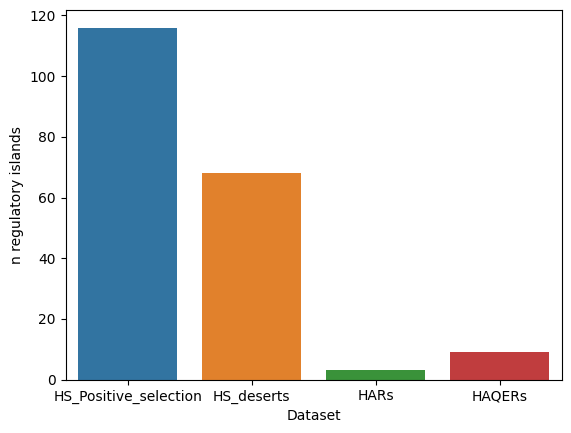

In [301]:
sns.barplot(data=d1, x="Dataset", y="n regulatory islands")